In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set settings for plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 500

In [19]:
profits = pd.read_csv('1_2_results/profits_1_2.csv')

#make a latex table with the profits.describe() values
print(profits['profit'].describe().to_latex())

\begin{tabular}{lr}
\toprule
 & profit \\
\midrule
count & 250.000000 \\
mean & 130697.435887 \\
std & 103575.920524 \\
min & 1243.278215 \\
25% & 52317.044859 \\
50% & 112518.300671 \\
75% & 186458.436248 \\
max & 547907.669394 \\
\bottomrule
\end{tabular}



In [20]:
results = pd.read_csv('1_2_results/market_results_1_2.csv')

In [21]:
#load scenarios
scenarios_df = pd.read_csv('../data/scenarios.csv')

In [22]:
scenarios = {}

for i in range(1, 1200 + 1):
    # Extract columns for each scenario
    columns = scenarios_df.columns[3*i-3:3*i-1]
    # Create a new DataFrame with the selected columns
    df_helper = scenarios_df.iloc[:, 3*i-3:3*i].copy()
    # Rename the columns
    df_helper.columns = ["price", "wind power", "grid_excess"]
    # Convert the 'grid_excess' column to float
    df_helper['grid_excess'] = df_helper['grid_excess'].astype(float)
    # Store the DataFrame in the dictionary
    scenarios[i] = df_helper

In [23]:
#average the first 250 scenarios
average = pd.DataFrame()
for i in range(1, 251):
    average = pd.concat([average, scenarios[i]], axis=1)

average_df = average.T.groupby(average.columns).mean().T
max_df = average.T.groupby(average.columns).max().T
min_df = average.T.groupby(average.columns).min().T

In [24]:
#merge the average with the results
results = results.merge(average_df, left_index=True, right_index=True)
results = results.merge(max_df, left_index=True, right_index=True, suffixes=('', '_max'))
results = results.merge(min_df, left_index=True, right_index=True, suffixes=('', '_min'))
results

,hour,p_DA,grid_excess,price,wind power,grid_excess_max,price_max,wind power_max,grid_excess_min,price_min,wind power_min
0,1,64.397419,0.668,107.8788,66.324714,1.0,160.04,151.992419,0.0,2.01,15.778419
1,2,14.389693,0.000,108.0756,64.453509,0.0,155.15,146.095645,0.0,1.38,14.389693
2,3,56.905645,0.664,105.9768,63.679742,1.0,150.00,146.817903,0.0,0.09,11.485500
3,4,50.954194,0.664,103.6112,60.937753,1.0,147.97,146.618387,0.0,0.08,9.385548
4,5,43.074194,0.668,102.5040,56.554442,1.0,145.97,150.135968,0.0,0.05,8.193597
5,6,45.957903,0.668,109.4552,53.967864,1.0,150.50,151.101613,0.0,0.00,5.908274
6,7,145.926935,1.000,127.9632,52.412115,1.0,176.01,145.926935,1.0,0.00,3.912145
7,8,13.341064,0.332,146.1460,52.475724,1.0,208.07,147.471129,0.0,0.00,2.733911
8,9,1.103897,0.000,157.1976,53.258144,0.0,235.06,147.725968,0.0,0.00,1.103897
9,10,146.945000,1.000,128.7956,55.152764,1.0,221.70,146.945000,1.0,0.04,0.977411


TypeError: Axes.fill_betweenx() missing 2 required positional arguments: 'y' and 'x1'

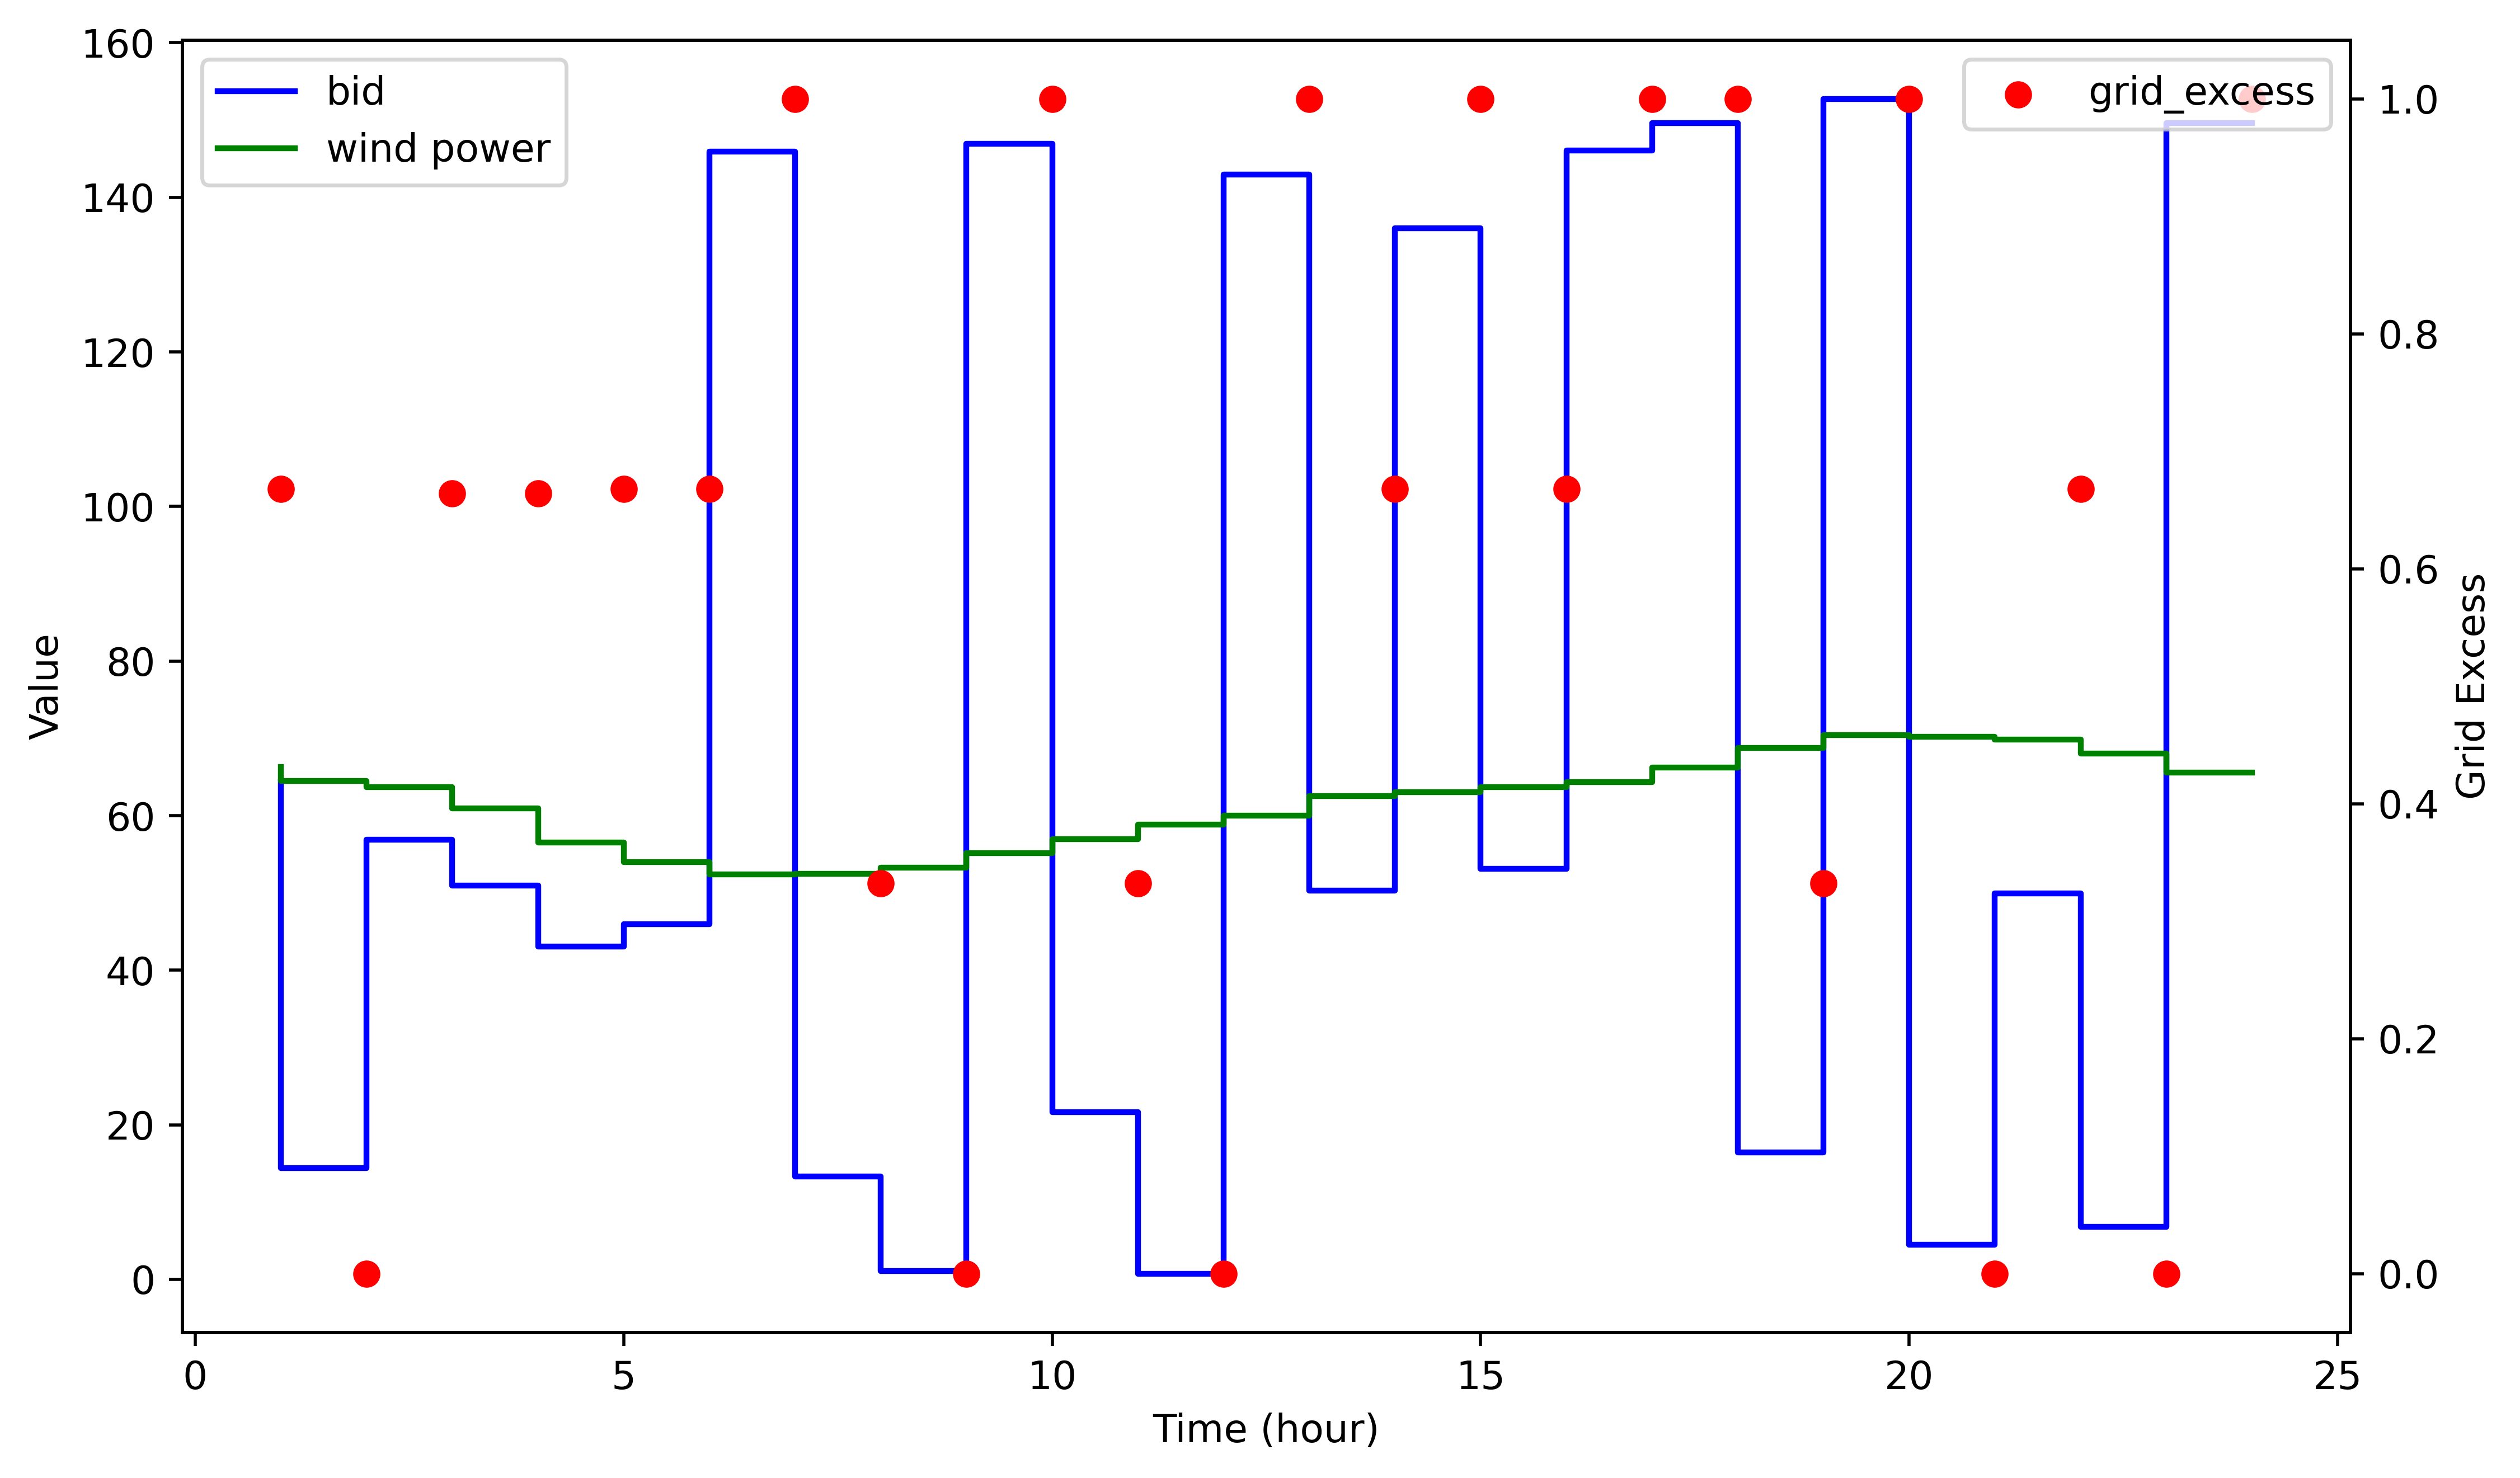

In [25]:
# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis
ax1.step(results['hour'], results['p_DA'], label='bid', color='b')
ax1.step(results['hour'], results['wind power'], label='wind power', color='g')
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('Value', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(results['hour'], results['grid_excess'], label='grid_excess', color='r')
ax2.set_ylabel('Grid Excess', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

ax1.fill_betweenx()

plt.title('Results')
plt.show()